# K-Means
: 평균을 이용한 군집화

1. 개념
    - 평균<span style='color:#808080'>(Mean)</span>을 이용해 K개의 그룹으로 자동 분류하는 비지도 학습 알고리즘
    - 종속변수가 존재하지 않는 데이터에서, 유사성이 높은 데이터들끼리의 모음
    - 서로 가까운 데이터끼리 묶어, 그룹의 중심점<span style='color:#808080'>(Centroid)</span>을 반복적으로 계산해 군집 형성
    - 스케일링 필수

2. 작업 순서
    1. 초기의 중심점 K개 지정
    2. 각 데이터 포인트들과 중심점과의 <span style='color:#808080'>(유클리디안) </span>거리 확인
    3. 가장 가까운 거리의 중심점을 찾아 해당 데이터를 그 중심점의 군집<span style='color:#808080'>(Cluster)</span>으로 할당
    4. 각 군집에 할당된 데이터들의 평균을 구해 새로운 중심점으로 지정
    5. 중심점의 위치 변화가 미미해질 때까지 (수렴할 때까지) 반복 실행

3. 장단점
    - 장점: 알고리즘이 단순하고 계산이 빨라 대용량 데이터셋에 적합
    - 단점:
        - 군집의 수(K)를 미리 지정해야 하며, 최적의 K를 찾기 어려움.
        - 이상치에 민감하여 군집 중심이 크게 이동될 수 있음.
        - 데이터가 구형(Spherical)이 아닌 경우 (예: 복잡한 모양, 길쭉한 모양) 성능이 저하됨.

4. **매개변수**
    - <span style="color:#ffd33d">**n_clusters**</span>
        </br>: 군집의 개수 지정
        - 기본값: 8
            - 너무 작거나 크면 적합도가 낮아져 성능 저하
    - <span style="color:#ffd33d">**init**</span>
        </br>: 초기의 중심점 지정 방법
        - 기본값:'k-means++'
            - 'k-means++' : *(기본값 사용 권장)* 초기 중심점을 최대한 멀리 떨어뜨려 선택해, 빠르고 안정적인 수렴을 유도
            - 'random' : 중심점을 무작위로 선택
    - <span style="color:#ffd33d">**n_init**</span>
        </br>: 초기화를 여러 번 시도(중심점을 여러 번 계산)하여 최적의 결과를 선택
        - 기본값: 'auto' <span style='color:#808080'>(구버전은 10)</span>
            - 값이 클수록 안정적이지만 시간은 증가함
    - <span style="color:#ffd33d">**max_iter**</span> <span style='color:#808080'>(버전에 따라 매개변수명이 다름)</span>
        </br>: 한 번의 실행에서 최대 반복 횟수
        - 기본값: 300
            - 일반적으로 300-500 사용
    - <span style="color:#ffd33d">**tol**</span>
        </br>: 중심점 이동의 변화량이 이 값보다 작은 경우 수렴
        - 기본값: 1e-4
            - 값이 작을수록 정확하지만 시간은 증가함
    - <span style="color:#ffd33d">**algorithm**</span>
        </br>: K-Means 계산 방법
        - 기본값: 'lloyd'
            - 'elkan' : 속도 향상 (밀집 데이터에서 유리)

5. **속성**
    - <span style="color:#ffd33d">**cluster_centers_**</span>
        </br>: 각 군집의 중심점 좌표
    - <span style="color:#ffd33d">**labels_**</span>
        </br>: 각 데이터의 군집의 번호
    - <span style="color:#ffd33d">**lnertia_**</span>
        </br>: 군집 내의 거리 제곱합
            - 작을수록 군집이 응집되어있음을 의미
    - <span style="color:#ffd33d">**n_iter_**</span>
        </br>: 마지막 반복에서의 수행 횟수

6. **메소드**
    - <span style="color:#ffd33d">**fit()**</span>
        </br>: 모델 학습
    - <span style="color:#ffd33d">**predict()**</span>
        </br>: 새로운 데이터를 받아 어떤 군집에 속하는지 예측
    - <span style="color:#ffd33d">**fit_predict()**</span>
        </br>: 동시에 학습 + 예측
    - <span style="color:#ffd33d">**transform()**</span>
        </br>: 각 데이터와 각 중심점 간의 거리를 행렬로 반환
    - <span style="color:#ffd33d">**fit_transform()**</span>
        </br>: 동시에 적합 + 거리 행렬 반환
    - <span style="color:#ffd33d">**score()**</span>
        </br>: inertia_ 값을 반환
        - 값이 클수록 군집의 품질이 높음
    - <span style="color:#ffd33d">**get_params() / set_params()**</span>
        </br>: 사용한 매개변수 확인 및 변경
        - GridSearchCV에서 사용

7. 검증
    - <span style="color:#ffd33d">**inertia**</span>
        </br>: 군집 내의 거리 제곱합
        - 작을수록 응집
    - <span style="color:#ffd33d">**silhouette_score**</span>
        </br>: 응집도 + 분리도 종합 점수
        - 1에 가까울수록 좋음
    - <span style="color:#ffd33d">**calinski_harabasz_score**</span>
        </br>: 군집 간의 분산 / 군집 내의 분산 비율
        - 높을수록 좋음
    - <span style="color:#ffd33d">**davies_bouldin_score**</span>
        </br>: 군집 간의 유사도 평균
        - 낮을수록 좋음
    - <span style="color:#ffd33d">**adjusted_rand_score**</span>
        </br>: 군집 간의 유사도 평균
        - 낮을수록 좋음
    - <span style="color:#ffd33d">**nomalized_mutual_info_score**</span>
        </br>: 실제 라벨과 군집 간 정보이론적 일치도
        - 1 = 일치,  0 = 무관

In [1]:
# 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score

In [3]:
# 데이터 로드
iris = pd.read_csv('../data/iris.csv')

# 독립 변수
x = iris.drop('target', axis= 1).values
# 종속 변수 (검증에 사용할 실제 라벨 데이터)
y = iris['target'].values

In [4]:
# K-Means 모델 생성
model = KMeans(
    n_clusters= 3,
    random_state= 42,
    n_init= 10
)

In [5]:
# 군집화는 Scaler를 사용하는 것이 일반적
x_std = StandardScaler().fit_transform(x)

In [6]:
# 모델에 학습
model.fit(x_std)
labels = model.predict(x_std)

In [ ]:
# 검증 지표를 계산하고 출력
inertia = model.inertia_    # 군집 내의 거리의 제곱합    # 작을수록 응집
silhouette = silhouette_score(x_std, labels)          # 1에 가까울수록 좋음
calinski = calinski_harabasz_score(x_std, labels)     # 높을수록 좋음
davies = davies_bouldin_score(x_std, labels)          # 낮을수록 좋음
# (실제 라벨이 존재하는 경우) 실제 라벨과의 계산
ari = adjusted_rand_score(y, labels)                  # 낮을수록 좋음
nmi = normalized_mutual_info_score(y, labels)         # 1 = 일치,  0 = 무관

print('inertia:', round(inertia, 3))
print('silhouette:', round(silhouette, 3))
print('calinski:', round(calinski, 3))
print('davies:', round(davies, 3))
print('ARI:', round(ari, 3))
print('NMI:', round(nmi, 3))

inertia: 140.966
silhouette: 0.459
calinski: 239.342
davies: 0.835
ARI: 0.62
NMI: 0.659


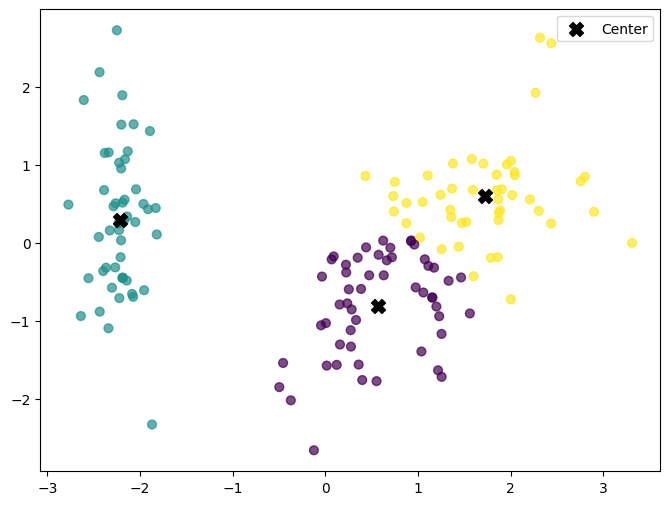

In [16]:
# 군집의 상황을 2차원 그래프로 시각화 (PCA 사용)
pca = PCA(n_components= 2)
# 스케일링된 데이터를 학습 및 변환
x_pca = pca.fit_transform(x_std)
# PCA를 이용하여 중심점을 2차원 데이터로 변환
centers_pca = pca.transform(model.cluster_centers_)

plt.figure(figsize=(8, 6))
# 2차원으로 구성된 스케일링 데이터의 산점도
plt.scatter(
    x_pca[:, 0], x_pca[:, 1], c = labels, cmap= 'viridis',
    s = 40, alpha= 0.7
)
# 2차원으로 구성된 중심점 데이터의 좌표 표시
plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1], c = 'black',
    s = 100, marker='X', label= 'Center'
)
plt.legend()
plt.show()

---

In [45]:
df = pd.read_csv('../data/bodyPerformance.csv')

df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
# 데이터프레임에서 문자열인 컬럼의 목록을 불러온다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [48]:
# 문자형 데이터를 숫자형으로 변환
# gender 컬럼의 데이터를 숫자형으로 변환
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'].values)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [49]:
df['gender'].value_counts()

gender
1    8467
0    4926
Name: count, dtype: int64

In [50]:
# 데이터프레임에서 문자열인 컬럼의 목록을 불러온다.
obj_cols = df.select_dtypes('object').columns.tolist()
obj_cols

['class']

In [55]:
# obj_cols를 이용하여 반복문 실행
for obj in obj_cols:
    # LabelEncoder를 생성
    le = LabelEncoder()
    # 각 컬럼의 데이터들을 LabelEncoder()를 이용하여 반환
    df[obj] = le.fit_transform(df[obj].values)

In [56]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [65]:
# 독립 변수, 종속 변수 생성
X = df.drop('class', axis= 1).values
Y = df['class'].values

# 스탠다드 스케일링
X_std = StandardScaler().fit_transform(X)

In [66]:
# 개수를 2개부터 10개까지 확인
# 검증 지표를 저장할 빈 리스트 생성
rows = []

for k in range(2, 11):
    # k: 군집 개수
    km = KMeans(n_clusters= k, n_init= 10, random_state= 42)
    pred = km.fit_predict(X_std)
    # 검증 지표
    iner = km.inertia_
    sil = silhouette_score(X_std, pred)
    cali = calinski_harabasz_score(X_std, pred)
    davies = davies_bouldin_score(X_std, pred)
    ari = adjusted_rand_score(Y, pred)
    nmi = normalized_mutual_info_score(Y, pred)

    row = {
        "K": k,
        "inertia": iner,
        "silhouette": sil,
        "calinski": cali,
        "davies": davies,
        "ARI": ari,
        "NMI": nmi
    }

    rows.append(row)

In [67]:
scores = pd.DataFrame(rows)
scores.round(3)

,K,inertia,silhouette,calinski,davies,ARI,NMI
0,2,94111.889,0.339,7571.308,1.234,0.003,0.003
1,3,81849.876,0.239,5355.456,1.634,0.031,0.037
2,4,72519.293,0.219,4603.596,1.691,0.048,0.058
3,5,67011.915,0.186,4011.249,1.728,0.034,0.041
4,6,63907.427,0.161,3494.700,1.789,0.031,0.044
5,7,59958.131,0.164,3250.798,1.763,0.059,0.096
6,8,57796.112,0.157,2961.934,1.809,0.059,0.100
7,9,55667.374,0.145,2754.585,1.816,0.062,0.110
8,10,53927.816,0.142,2575.276,1.832,0.060,0.110


In [69]:
# 최적의 k값은 2, 원본의 class의 개수는 4
k_list = [2, 4]

final_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, n_init = 10, random_state=42)
    pred = km.fit_predict(X_std)

    # 검증 지표
    iner = km.inertia_
    sil = silhouette_score(X_std, pred)
    cali = calinski_harabasz_score(X_std, pred)
    davies = davies_bouldin_score(X_std, pred)
    row = {
        "K" : k, 
        "silhouette" : sil, 
        "calinski" : cali, 
        "davies" : davies
    }
    final_scores.append(row)

In [70]:
pd.DataFrame(final_scores)

,K,silhouette,calinski,davies
0,2,0.339082,7571.307615,1.234227
1,4,0.218644,4603.595793,1.691045


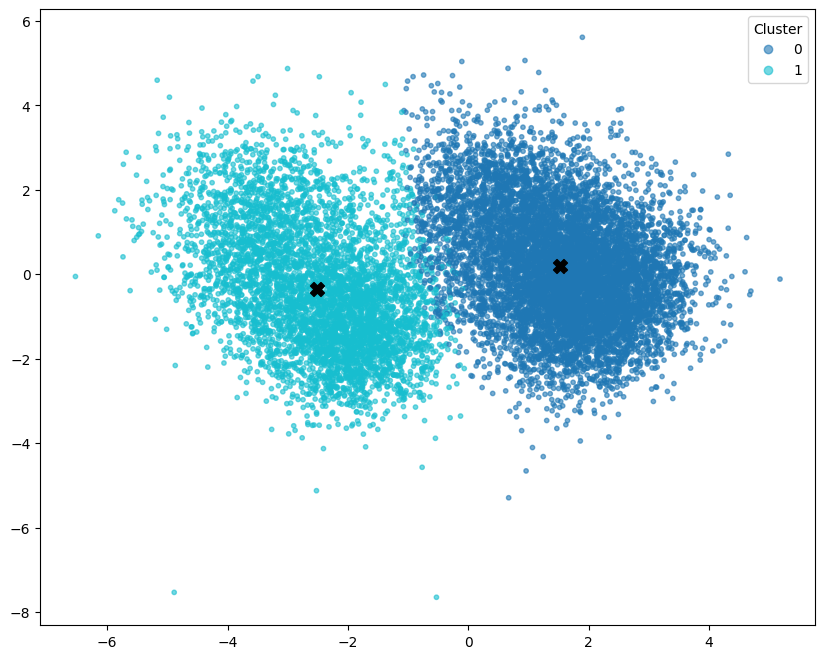

In [74]:
# 군집의 개수가 2인 경우 중심점과 데이터의 군집을 2차원 그래프로 확인
# PCA를 통해서 2차원으로 차원 축소 후 그래프 시각화
pca = PCA(n_components= 2, random_state= 42)
x_pca = pca.fit_transform(X_std)

# n_clusters로 군집 개수 정하기
km_best = KMeans(n_clusters= 2, n_init= 10, random_state= 42).fit(X_std)

# 군집의 번호 출력
labels_best = km_best.labels_
# 군집의 중심점 좌표 출력
center_best = km_best.cluster_centers_
# 중심점 2차원 축소
center_pca = pca.transform(center_best)

plt.figure(figsize=(10, 8))
# 2차원으로 차원 축소한 데이터들의 분포
sc = plt.scatter(x_pca[:, 0], x_pca[:, 1], c= labels_best, s= 10, cmap= 'tab10', alpha= 0.6)
# 중심점 좌표를 그래프에 추가
plt.scatter(center_pca[:, 0], center_pca[:, 1], c= 'black', s= 100, marker= 'X', label= 'Center')

# 범례 추가
plt.legend(*sc.legend_elements(), title='Cluster')
plt.show()

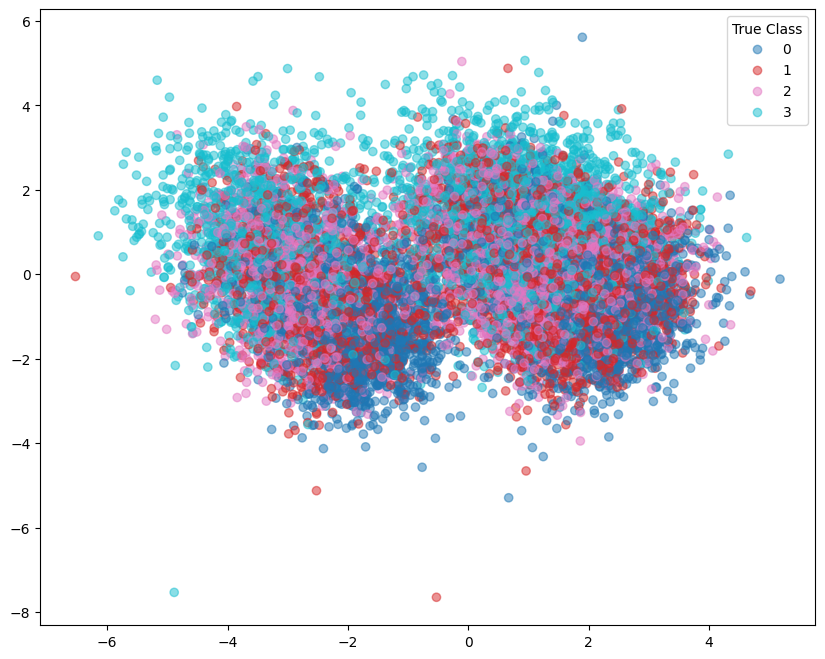

In [77]:
# 실제 class별 데이터의 분포도를 확인
plt.figure(figsize=(10, 8))
sc_true = plt.scatter(
    x_pca[:, 0], x_pca[:, 1], c= Y, cmap= 'tab10', alpha= 0.5
)
plt.legend(*sc_true.legend_elements(), title='True Class')
plt.show()

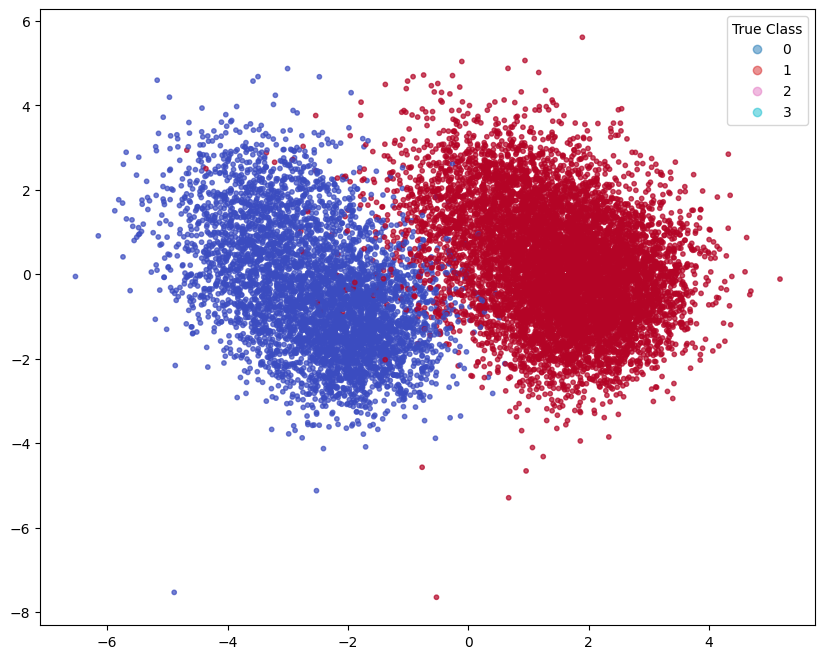

In [81]:
plt.figure(figsize=(10, 8))
sc_gender = plt.scatter(
    x_pca[:, 0], x_pca[:, 1], c= df['gender'].values, cmap='coolwarm', s= 10, alpha= 0.7
)
plt.legend(*sc_true.legend_elements(), title='True Class')
plt.show()